In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Load embedded data and labels

In [4]:
X_train = np.load("D:/Projects/Sentiment_Analysis/data/features/PhoBERT/X_train_phobert.npz")["arr_0"]
X_dev   = np.load("D:/Projects/Sentiment_Analysis/data/features/PhoBERT/X_dev_phobert.npz")["arr_0"]
X_test  = np.load("D:/Projects/Sentiment_Analysis/data/features/PhoBERT/X_test_phobert.npz")["arr_0"]

y_train = joblib.load("D:/Projects/Sentiment_Analysis/models/PhoBERT/y_train.pkl")
y_dev   = joblib.load("D:/Projects/Sentiment_Analysis/models/PhoBERT/y_dev.pkl")
y_test  = joblib.load("D:/Projects/Sentiment_Analysis/models/PhoBERT/y_test.pkl")

print("Shapes:")
print("Train:", X_train.shape, " | ", len(y_train))
print("Dev  :", X_dev.shape, " | ", len(y_dev))
print("Test :", X_test.shape, " | ", len(y_test))

Shapes:
Train: (11426, 768)  |  11426
Dev  : (3166, 768)  |  3166
Test : (3166, 768)  |  3166


#### Check for imbalance

In [8]:
import pandas as pd
train_df = pd.read_csv("D:/Projects/Sentiment_Analysis/data/interim/train.csv")
print(train_df["sentiment"].value_counts())

sentiment
2    5643
0    5325
1     458
Name: count, dtype: int64


Classes 0 and 2 are almost balanced → okay.

But class 1 (only 458 samples) is very small — only 1/10 compared to the other classes.
→ The model can easily “ignore” this class, predicting only 0 or 2 to increase accuracy.

#### Initialize and Train Logistic Regression

In [10]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Predict on dev set

In [12]:
y_pred = log_reg.predict(X_dev)

### Evaluate results

In [13]:
print("Accuracy:", accuracy_score(y_dev, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_dev, y_pred))
print("\nClassification Report:\n", classification_report(y_dev, y_pred, digits=4))

Accuracy: 0.8404927353126974

Confusion Matrix:
 [[1208  102   99]
 [  42   78   47]
 [ 116   99 1375]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8843    0.8573    0.8706      1409
           1     0.2796    0.4671    0.3498       167
           2     0.9040    0.8648    0.8840      1590

    accuracy                         0.8405      3166
   macro avg     0.6893    0.7297    0.7015      3166
weighted avg     0.8623    0.8405    0.8499      3166



#### Visualize the results:

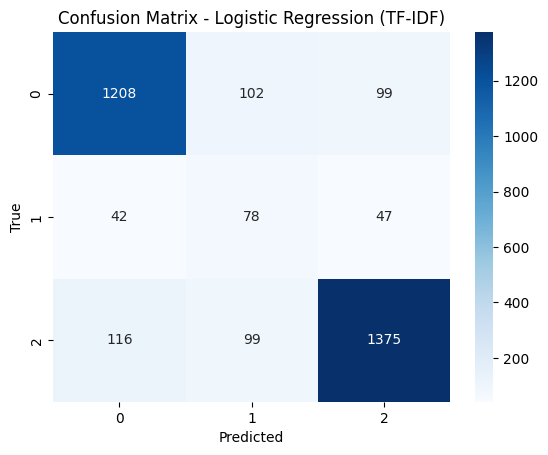

In [21]:
cm = confusion_matrix(y_dev, y_pred, labels=log_reg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

#### PhoBERT + Logistic Regression model evaluation results

After training the Logistic Regression model on the PhoBERT feature-based feature, the model achieved an overall accuracy of 84.05%, showing a relatively good ability to classify emotions on a three-class dataset (positive, negative, neutral).

Observing the Confusion Matrix, we see that the model predicts quite accurately for sentences with positive and negative emotions, shown through the precision and recall values ​​above 0.85. However, for the neutral class, the model has more difficulty with the recall only reaching 0.47 and the F1-score around 0.35, showing that many neutral sentences are confused with the other two classes. This reflects the difficult-to-distinguish nature of neutral emotions in Vietnamese – when the context often does not clearly convey emotions.

Overall, the macro F1 = 0.70 and weighted F1 = 0.85 metrics show that the model learns good sentiment features, especially when compared to the previous TF-IDF (lower F1 and accuracy ~78%). This demonstrates that the modern PhoBERT embedding provides superior classification performance due to its deeper semantic representation.

#### Development direction

**Fine-tune PhoBERT directly** on the sentiment dataset so that the model learns the context of the whole sequence, instead of just using the vector [CLS].

Improve the training data, especially rebalance the number of samples of the neutral class by collecting more or using oversampling techniques (like SMOTE).

Experiment with additional non-linear classification models like SVM or MLP to better exploit PhoBERT's embedding space.

Combine TF-IDF and PhoBERT features (feature fusion) to take advantage of both surface statistical information and contextual semantics.

In [23]:
joblib.dump(log_reg, "D:/Projects/Sentiment_Analysis/models/PhoBERT/logistic_phobert.pkl")
print("\nLogistic Regression (PhoBERT feature-based) Trained and saved successfully!")


Logistic Regression (PhoBERT feature-based) Trained and saved successfully!
